# Supervised Model 1 - Random Forest Regression
In this approach we train a random forest regression on encoded inputs of Ligand SMILES and Target Drug Sequence to try and predict the affinity between the two. It is a classic regression task where we are attempting to minimize the MSE between the predicted and actual values


## Prerequisites

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 30.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Loading

In [12]:
import os
print(os.getcwd())
data = pd.read_csv('EC50_bind.tsv', sep='\t')
data.head()

/content


,drug_id,target_id,smiles,target_seq,origin_affinity,affinity
0,100000,P49862,CN1CCN(Cc2c(O)c(Cl)cc3c(cc(=O)oc23)-c2ccccc2)CC1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,68293,4.165624
1,100001,P49862,COc1ccccc1C1CC(=Nc2nnnn12)c1ccc(C)cc1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,23546,4.628083
2,100002,P49862,Cc1oc2c(CN3CCCC3)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,>69498,4.158021
3,100003,P49862,CCN1C(c2ccccn2)n2c(nc3ccccc23)-c2ccccc12,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,>69511,4.157940
4,100004,P49862,Oc1ccc2c(occ(-c3ccc(Br)cc3)c2=O)c1CN1CCOCC1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,66092,4.179851


In [15]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    else:
        return np.zeros((n_bits,))

def sequence_to_composition(sequence):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    composition = [sequence.count(aa) / len(sequence) for aa in amino_acids]
    return np.array(composition)

data['Fingerprint'] = data['smiles'].apply(smiles_to_fingerprint)
data['Composition'] = data['target_seq'].apply(sequence_to_composition)

X_drug = np.array(list(data['Fingerprint']))
X_target = np.array(list(data['Composition']))

X = np.hstack([X_drug, X_target])

y = data['affinity'].values

Streaming output truncated to the last 5000 lines.
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:12:35] DEPRECATION WARNING: please use MorganGenerator
[23:1

[False False False ... False False False]


In [17]:
nan_indices = np.argwhere(np.isnan(y))
print(nan_indices)

[]


## Model Training and Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)
model.fit(X_train_sampled, y_train_sampled)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.713357644376728


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.6, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)
model.fit(X_train_sampled, y_train_sampled)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7137086662042544


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_train_sampled, y_train_sampled)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.2261141109899207


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_train_sampled, y_train_sampled)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.1798079016047034


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1, random_state=42)
model.fit(X_train_sampled, y_train_sampled)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.7148143113893008


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=30, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5410062908410359


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5140156211634177


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.509932728993962


In [19]:
joblib.dump(model, 'random_forest_regression_dta_model.pkl')

print("Model saved successfully!")

Model saved successfully!


## Model Loading and Inference

In [20]:
# Run prerequisites before trying to do inference!!
loaded_model = joblib.load('random_forest_regression_dta_model.pkl')

print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    else:
        return np.zeros((n_bits,))

def sequence_to_composition(sequence):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    composition = [sequence.count(aa) / len(sequence) for aa in amino_acids]
    return np.array(composition)

In [ ]:
# Actual Data Point
new_smiles = 'CN1CCN(Cc2c(O)c(Cl)cc3c(cc(=O)oc23)-c2ccccc2)CC1'
new_sequence = 'MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVALLSGNQLHCGGVLVNERWVLTAAHCKMNEYTVHLGSDTLGDRRAQRIKASKSFRHPGYSTQTHVNDLMLVKLNSQARLSSMVKKVRLPSRCEPPGTTCTVSGWGTTTSPDVTFPSDLMCVDVKLISPQDCTKVYKDLLENSMLCAGIPDSKKNACNGDSGGPLVCRGTLQGLVSWGTFPCGQPNDPGVYTQVCKFTKWINDTMKKHR'
# new_affinity = 4.16562380901496

new_fingerprint = smiles_to_fingerprint(new_smiles)
new_composition = sequence_to_composition(new_sequence)

new_input = np.hstack([new_fingerprint, new_composition]).reshape(1, -1)
predicted_affinity = loaded_model.predict(new_input)

print(f"Predicted Affinity: {predicted_affinity[0]}")

Predicted Affinity: 4.560295593125311


[01:07:51] DEPRECATION WARNING: please use MorganGenerator


## Data Visualizations

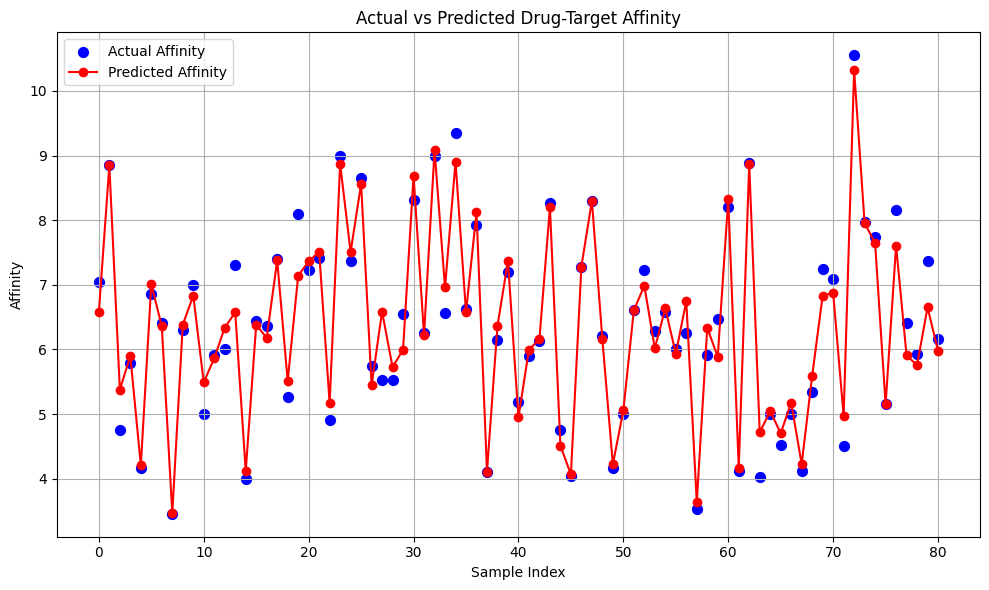

In [22]:
import matplotlib.pyplot as plt

sample_fraction = 0.0005

X_sampled, _, y_sampled, _ = train_test_split(X, y, test_size=(1 - sample_fraction), random_state=42)
y_pred = loaded_model.predict(X_sampled)
sorted_indices = np.argsort(X_sampled[:, 0])
X_sampled_sorted = X_sampled[sorted_indices]
y_sampled_sorted = y_sampled[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_sampled_sorted)), y_sampled_sorted, color='blue', label='Actual Affinity', s=50)
plt.plot(np.arange(len(y_pred_sorted)), y_pred_sorted, color='red', label='Predicted Affinity', marker='o')

plt.title('Actual vs Predicted Drug-Target Affinity')
plt.xlabel('Sample Index')
plt.ylabel('Affinity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

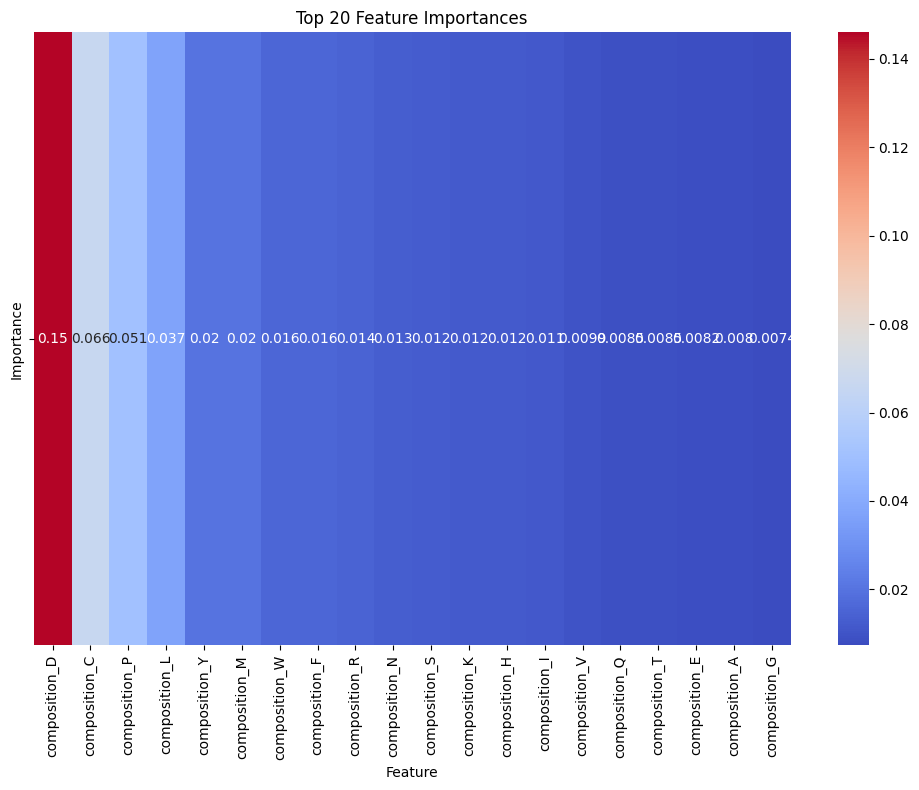

In [24]:
import seaborn as sns

feature_names = [f'fingerprint_{i}' for i in range(2048)] + [f'composition_{aa}' for aa in 'ACDEFGHIKLMNPQRSTVWY']

importances = loaded_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(feature_importance_df.head(20).set_index('Feature').T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

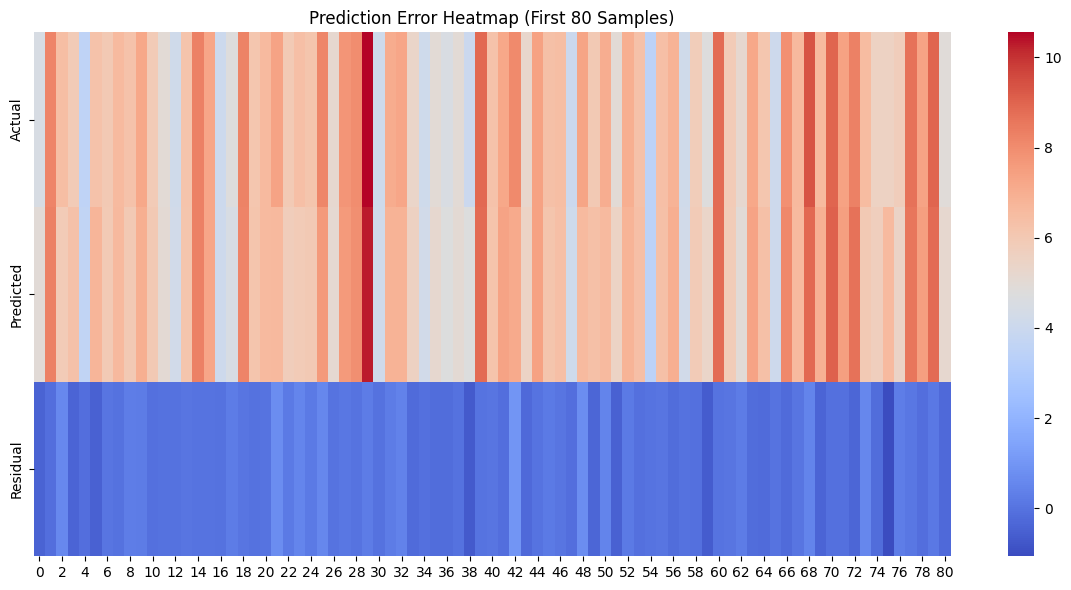

In [25]:
y_pred = loaded_model.predict(X_sampled)

residuals = y_sampled - y_pred

residuals_df = pd.DataFrame({
    'Actual': y_sampled,
    'Predicted': y_pred,
    'Residual': residuals
})

plt.figure(figsize=(12, 6))
sns.heatmap(residuals_df.head(100).T, annot=False, cmap='coolwarm', cbar=True)
plt.title('Prediction Error Heatmap (First 80 Samples)')
plt.tight_layout()
plt.show()

<ipython-input-10-c80182425abb>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_depth'] = df['max_depth'].replace('Infinity', 100)


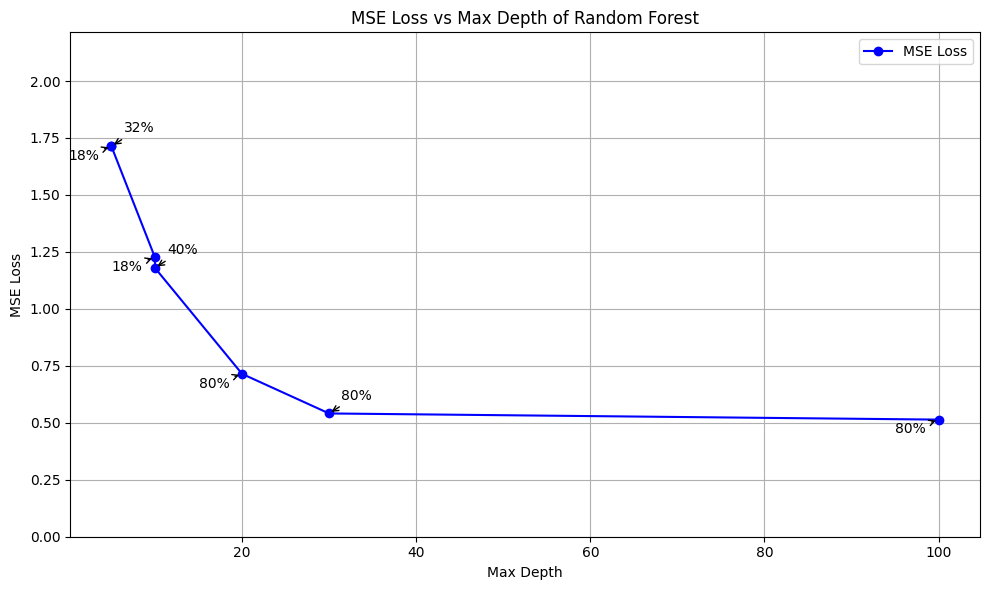

In [10]:
import matplotlib.pyplot as plt
data = {
    'max_depth': [5, 5, 10, 10, 20, 30, 'Infinity'],
    'mse_loss': [1.713357644376728, 1.7137086662042544,
                 1.2261141109899207, 1.1798079016047034,
                 0.7148143113893008, 0.5410062908410359,
                 0.5140156211634177],
    'train_size_percent': ['18%', '32%', '18%', '40%', '80%', '80%', '80%']
}

df = pd.DataFrame(data)

df['max_depth'] = df['max_depth'].replace('Infinity', 100)

max_depths = df['max_depth'].astype(float)
mse_losses = df['mse_loss']
train_sizes = df['train_size_percent']

plt.figure(figsize=(10, 6))
plt.plot(max_depths, mse_losses, marker='o', linestyle='-', color='b', label='MSE Loss')

for i in range(len(max_depths)):
    offset_x = -20 if i % 2 == 0 else 20
    offset_y = -10 if i % 2 == 0 else 10

    plt.annotate(f'{train_sizes[i]}',
                 (max_depths[i], mse_losses[i]),
                 textcoords="offset points", xytext=(offset_x, offset_y),
                 ha='center', fontsize=10,
                 arrowprops=dict(arrowstyle="->", color='black', lw=1))

plt.title('MSE Loss vs Max Depth of Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('MSE Loss')
plt.grid(True)

plt.ylim(0, max(mse_losses) + 0.5)

plt.legend()
plt.tight_layout()
plt.show()